In [1]:
import numpy as np
import torch
import torch.nn as nn # neural network
import torch.optim as optim
import torchvision
from torchvision import datasets # CIFAR10, CIFAR100
from torchvision import transforms # augmentation lib
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [4]:
def get_dataloaders_cifar10(batch_size, num_workers=0,
                            validation_fraction=None,
                            train_transforms=None,
                            test_transforms=None):
    if train_transforms is None:
        train_transforms = transforms.ToTensor()
    if test_transforms is None:
        test_transforms = transforms.ToTensor()
    train_dataset = datasets.CIFAR10(root='/kaggle/working/data',
                                     train=True,
                                     transform=train_transforms,
                                     download=True)

    valid_dataset = datasets.CIFAR10(root='/kaggle/working/data',
                                     train=True,
                                     transform=test_transforms)
    
    test_dataset = datasets.CIFAR10(root='/kaggle/working/data',
                                    train=False,
                                    transform=test_transforms)

    if validation_fraction is not None:
        num = int(validation_fraction * 50000)
        train_indices = torch.arange(0, 50000 - num)
        valid_indices = torch.arange(50000 - num, 50000)
        train_sampler = SubsetRandomSampler(train_indices)
        valid_sampler = SubsetRandomSampler(valid_indices)
        valid_loader = DataLoader(dataset=valid_dataset,
                                  batch_size=batch_size,
                                  num_workers=num_workers,
                                  sampler=valid_sampler)

        train_loader = DataLoader(dataset=train_dataset,
                                  batch_size=batch_size,
                                  num_workers=num_workers,
                                  drop_last=True,
                                  sampler=train_sampler)
    else:
        train_loader = DataLoader(dataset=train_dataset,
                                  batch_size=batch_size,
                                  num_workers=num_workers,
                                  drop_last=True,
                                  shuffle=True)
    test_loader = DataLoader(dataset=test_dataset,
                             batch_size=batch_size,
                             num_workers=num_workers,
                             shuffle=False)
    if validation_fraction is None:
        return train_loader, test_loader

    else:
        return train_loader, valid_loader, test_loader

In [5]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),  # 랜덤 수평 뒤집기
    torchvision.transforms.RandomCrop(32, padding=4),  # 랜덤 크롭 (패딩 포함)
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),                
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_loader, valid_loader, test_loader = get_dataloaders_cifar10(
    batch_size=64,
    validation_fraction=0.1,
    train_transforms=train_transforms,
    test_transforms=test_transforms,
    num_workers=2)

100%|██████████| 170498071/170498071 [00:08<00:00, 20099646.53it/s]


Extracting /kaggle/working/data/cifar-10-python.tar.gz to /kaggle/working/data


In [6]:
# train_loader, valid_loader = data_loader(data_dir='/kaggle/working/data', batch_size=64)

In [7]:
# test_loader = data_loader(data_dir='/kaggle/working/data', batch_size=64, test=True)

In [8]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes=100):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected layer
        self.fc = nn.Sequential(
            nn.Linear(7*7*512, 4096),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(4096, num_classes)
        )
        for m in self.modules():
            if isinstance(m, torch.torch.nn.Conv2d) or isinstance(m, torch.torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()
        self.avgpool = torch.nn.AdaptiveAvgPool2d((7, 7))        



    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
        x = self.layer13(x)
        x = self.avgpool(x)
        x = x.reshape(x.size(0), -1)  # flatten (batch_size, num_channels * height * width)
        x = self.fc(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [9]:
!pip install torchinfo  # Install the missing module

from torchinfo import summary  # Import after installation

features = torch.randn(1, 3, 224, 224)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16(num_classes=10).to(device)
model = model.to(device)
features = features.to(device)

summary(model, input_data=features, col_names=("input_size", "output_size", "num_params"))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
VGG16                                    [1, 3, 224, 224]          [1, 10]                   --
├─Sequential: 1-1                        [1, 3, 224, 224]          [1, 64, 224, 224]         --
│    └─Conv2d: 2-1                       [1, 3, 224, 224]          [1, 64, 224, 224]         1,792
│    └─BatchNorm2d: 2-2                  [1, 64, 224, 224]         [1, 64, 224, 224]         128
│    └─ReLU: 2-3                         [1, 64, 224, 224]         [1, 64, 224, 224]         --
├─Sequential: 1-2                        [1, 64, 224, 224]         [1, 64, 112, 112]         --
│    └─Conv2d: 2-4                       [1, 64, 224, 224]         [1, 64, 224, 224]         36,928
│    └─BatchNorm2d: 2-5                  [1, 64, 224, 224]         [1, 64, 224, 224]         128
│    └─ReLU: 2-6                         [1, 64, 224, 224]         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-7     

In [10]:
total_step = len(train_loader)
total_step

703

In [11]:
def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch, results_dir=None, averaging_iterations=100):
    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)), (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([0, np.max(minibatch_loss_list[1000:]) * 1.5])

    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list, np.ones(averaging_iterations,) / averaging_iterations, mode='valid'), label='Running Average')
    ax1.legend()


    # Second x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs + 1))
    newpos = [e * iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, '/kaggle/working/data/plot_training_loss.pdf')
        plt.savefig(image_path)

def plot_accuracy(train_acc_list, valid_acc_list, results_dir):
    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs + 1), train_acc_list, label='Training')
    plt.plot(np.arange(1, num_epochs + 1), valid_acc_list, label='Validation')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, '/kaggle/working/data/plot_acc_training_validation.pdf')
        plt.savefig(image_path)

In [12]:
def compute_accuracy(model, data_loader, device):
    with torch.no_grad():
        correct_pred, num_examples = 0, 0
        for i, (features, targets) in enumerate(data_loader):
            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float() / num_examples * 100

In [13]:
def train_model(model, num_epochs, train_loader, valid_loader, test_loader, optimizer, device, logging_interval=50, scheduler=None, scheduler_on='valid_acc', start_epoch=0, checkpoint_path='/kaggle/working/data/checkpoint1.pth.tar'):
    start_time = time.time()
    minibatch_loss_list, train_acc_list, valid_acc_list = [], [], []
    train_loss_list, valid_loss_list = []

    for epoch in range(start_epoch, num_epochs):
        model.train()
        running_loss = 0.0
        for batch_idx, (features, targets) in enumerate(train_loader):
            features = features.to(device)
            targets = targets.to(device)

            logits = model(features)
            loss = torch.nn.functional.cross_entropy(logits, targets)
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

            minibatch_loss_list.append(loss.item())
            running_loss += loss.item() * features.size(0)
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} | Batch {batch_idx:04d}/{len(train_loader):04d} | Loss: {loss:.4f}')

        train_loss = running_loss / len(train_loader.dataset)
        train_loss_list.append(train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            train_acc = compute_accuracy(model, train_loader, device=device)
            valid_acc = compute_accuracy(model, valid_loader, device=device)
            
            for features, targets in valid_loader:
                features, targets = features.to(device), targets.to(device)
                logits = model(features)
                loss = torch.nn.functional.cross_entropy(logits, targets)
                running_val_loss += loss.item() * features.size(0)
                
            valid_loss = running_val_loss / len(valid_loader.dataset)
            valid_loss_list.append(valid_loss)

            print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} | Train Loss: {train_loss:.4f} | Validation Loss: {valid_loss:.4f} | Train: {train_acc :.2f}% | Validation: {valid_acc :.2f}%')
            train_acc_list.append(train_acc.item())
            valid_acc_list.append(valid_acc.item())

        elapsed = (time.time() - start_time)/60
        print(f'Time elapsed: {elapsed:.2f} min')

        if scheduler is not None:
            if scheduler_on == 'valid_acc':
                scheduler.step(valid_acc_list[-1])
            elif scheduler_on == 'minibatch_loss':
                scheduler.step(minibatch_loss_list[-1])
            else:
                raise ValueError(f'Invalid `scheduler_on` choice.')


        save_checkpoint({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, filename=checkpoint_path)

    elapsed = (time.time() - start_time)/60
    print(f'Total Training Time: {elapsed:.2f} min')

    test_acc = compute_accuracy(model, test_loader, device=device)
    print(f'Test accuracy {test_acc :.2f}%')

    return minibatch_loss_list, train_acc_list, valid_acc_list, train_loss_list, valid_loss_list


In [14]:
def plot_epoch_losses(train_loss_list, valid_loss_list):
    plt.plot(train_loss_list, label='Train loss')
    plt.plot(valid_loss_list, label='Validation loss')
    plt.legend()
    plt.grid(True)
    plt.show()

No checkpoint found, starting from scratch


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/tmp/ipykernel_30/1630611104.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

Epoch: 001/030 | Batch 0000/0703 | Loss: 5.2408
Epoch: 001/030 | Batch 0100/0703 | Loss: 2.2738
Epoch: 001/030 | Batch 0200/0703 | Loss: 2.2225
Epoch: 001/030 | Batch 0300/0703 | Loss: 2.2165
Epoch: 001/030 | Batch 0400/0703 | Loss: 2.3066
Epoch: 001/030 | Batch 0500/0703 | Loss: 2.1725
Epoch: 001/030 | Batch 0600/0703 | Loss: 2.1558
Epoch: 001/030 | Batch 0700/0703 | Loss: 2.1879
Epoch: 001/030 | Train Loss: 3.6227 | Validation Loss: 0.2062 | Train: 23.84% | Validation: 24.26%
Time elapsed: 8.93 min
Epoch: 002/030 | Batch 0000/0703 | Loss: 2.1728
Epoch: 002/030 | Batch 0100/0703 | Loss: 2.2391
Epoch: 002/030 | Batch 0200/0703 | Loss: 2.1495
Epoch: 002/030 | Batch 0300/0703 | Loss: 2.0590
Epoch: 002/030 | Batch 0400/0703 | Loss: 2.0642
Epoch: 002/030 | Batch 0500/0703 | Loss: 2.1133
Epoch: 002/030 | Batch 0600/0703 | Loss: 1.9881
Epoch: 002/030 | Batch 0700/0703 | Loss: 2.1289
Epoch: 002/030 | Train Loss: 1.8675 | Validation Loss: 0.1967 | Train: 27.56% | Validation: 28.24%
Time elapse

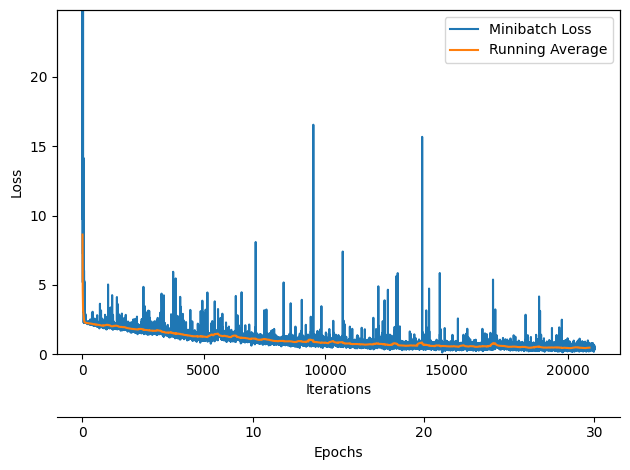

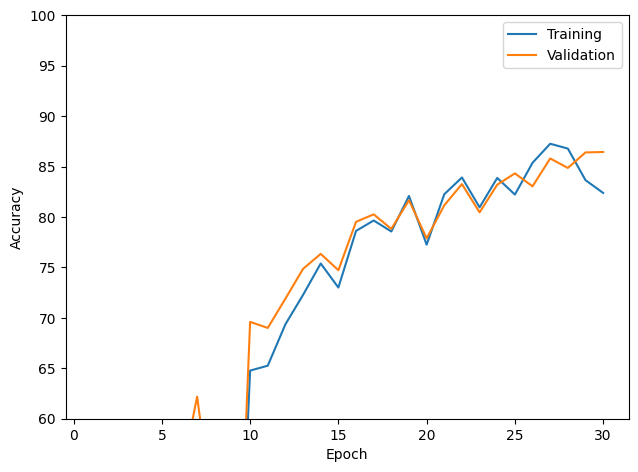

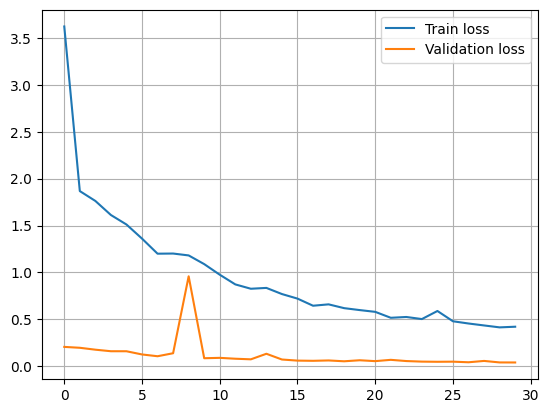

In [15]:
# hyper parameters
num_classes = 10
num_epochs = 30
batch_size = 64
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16(num_classes).to(device)

# loss and optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, mode='max', verbose=True)

# checkpoints
def save_checkpoint(state, filename='/kaggle/working/data/checkpoint1.pth.tar'):
    torch.save(state, filename)

# load checkpoints
def load_checkpoint(filename):
    checkpoint = torch.load(filename)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    return epoch

start_epoch = 0
checkpoint_path = '/kaggle/working/data/checkpoint1.pth.tar'
try:
    start_epoch = load_checkpoint(checkpoint_path)
    print(f'Checkpoint loaded, starting from epoch {start_epoch + 1}')
except FileNotFoundError:
    print('No checkpoint found, starting from scratch')

# train and evaluation
minibatch_loss_list, train_acc_list, valid_acc_list, train_loss_list, valid_loss_list = train_model(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    num_epochs=num_epochs,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    device=device,
    scheduler_on='valid_acc',
    start_epoch=start_epoch,
    checkpoint_path=checkpoint_path,
    logging_interval=100
)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=num_epochs,
                   iter_per_epoch=len(train_loader),
                   results_dir='None',
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list, 
              valid_acc_list=valid_acc_list,
              results_dir='None')

plt.ylim([60, 100])
plt.show()

plot_epoch_losses(train_loss_list, valid_loss_list)